# Maximum Likelihood Estimation and Gradient Descent

In this discussion, we will lay down the foundational principles that enable the optimal estimation of a given algorithm's parameters using maximum likelihood estimation and gradient descent. Using logistic regression, we will first walk through the mathematical solution, and subsequently we shall implement our solution in code. 

### Maximum Likelihood

The logistic model uses the sigmoid function (denoted by sigma) to estimate the probability that a given sample _y_ belongs to class 1 given inputs _X_ and weights _W_,

\begin{align}
\ P(y=1 \mid x) = \sigma(W^TX)
\end{align}

where the sigmoid of our activation function for a given _n_ is:

\begin{align}
\large y_n = \sigma(a_n) = \frac{1}{1+e^{-a_n}}
\end{align}

The accuracy of our model predictions can be captured by the objective function _L_, which we are trying to maxmize.

\begin{align}
\large L = \displaystyle\prod_{n=1}^N y_n^{t_n}(1-y_n)^{1-t_n}
\end{align}

If we take the log of the above function, we obtain the maximum log likelihood function, whose form will enable easier calculations of partial derivatives. Specifically, taking the log and maximizing it is acceptable because the log likelihood is monotomically increasing, and therefore it will yield the same answer as our objective function.

\begin{align}
\ L = \displaystyle \sum_{n=1}^N t_nlogy_n+(1-t_n)log(1-y_n)
\end{align}

In our example, we will actually convert the objective function (which we would try to maximize) into a cost function (which we are trying to minimize) by converting it into the negative log likelihood function:

\begin{align}
\ J = -\displaystyle \sum_{n=1}^N t_nlogy_n+(1-t_n)log(1-y_n)
\end{align}

### Gradient Descent

Once we have an objective function, we can generally take its derivative with respect to the parameters (weights), set it equal to zero, and solve for the parameters to obtain the ideal solution. However, in the case of logistic regression (and many other complex or otherwise non-linear systems), this analytical method doesn't work. Instead, we resort to a method known as gradient descent, whereby we randomly initialize and then incrementally update our weights by calculating the slope of our objective function. When applying the cost function, we want to continue updating our weights until the slope of the _gradient_ gets as close to zero as possible. We can show this mathematically:

\begin{align}
\ w:=w+\triangle w
\end{align}

where the second term on the right is defined as the learning rate times the derivative of the cost function with respect to the the weights (which is our gradient):

\begin{align}
\ \triangle w = \eta\triangle J(w)
\end{align}

Thus, we want to take the derivative of the cost function with respect to the weight, which, using the chain rule, gives us:

\begin{align}
\frac{J}{\partial w_i} = \displaystyle \sum_{n=1}^N \frac{\partial J}{\partial y_n}\frac{\partial y_n}{\partial a_n}\frac{\partial a_n}{\partial w_i}
\end{align}

Thus, we are looking to obtain three different derivatives. Let us start by solving for the derivative of the cost function with respect to _y_:

\begin{align}
\frac{\partial J}{\partial y_n} = t_n \frac{1}{y_n} + (1-t_n) \frac{1}{1-y_n}(-1) = \frac{t_n}{y_n} - \frac{1-t_n}{1-y_n}
\end{align}

Next, let us solve for the derivative of _y_ with respect to our activation function:

\begin{align}
\large y_n = \sigma(a_n) = \frac{1}{1+e^{-a_n}}
\end{align}

\begin{align}
\frac{\partial y_n}{\partial a_n} = \frac{-1}{(1+e^{-a_n})^2}(e^{-a_n})(-1) = \frac{e^{-a_n}}{(1+e^-a_n)^2} = \frac{1}{1+e^{-a_n}} \frac{e^{-a_n}}{1+e^{-a_n}}
\end{align}

\begin{align}
\frac{\partial y_n}{\partial a_n} = y_n(1-y_n)
\end{align}

And lastly, we solve for the derivative of the activation function with respect to the weights:

\begin{align}
\ a_n = W^TX_n
\end{align}

\begin{align}
\ a_n = w_0x_{n0} + w_1x_{n1} + w_2x_{n2} + \cdots + w_Nx_{NN}
\end{align}

\begin{align}
\frac{\partial a_n}{\partial w_i} = x_{ni}
\end{align}

Now we can put it all together and simply.

\begin{align}
\frac{\partial J}{\partial w_i} = - \displaystyle\sum_{n=1}^N\frac{t_n}{y_n}y_n(1-y_n)x_{ni}-\frac{1-t_n}{1-y_n}y_n(1-y_n)x_{ni}
\end{align}

\begin{align}
= - \displaystyle\sum_{n=1}^Nt_n(1-y_n)x_{ni}-(1-t_n)y_nx_{ni}
\end{align}

\begin{align}
= - \displaystyle\sum_{n=1}^N[t_n-t_ny_n-y_n+t_ny_n]x_{ni}
\end{align}

\begin{align}
\frac{\partial J}{\partial w_i} = \displaystyle\sum_{n=1}^N(y_n-t_n)x_{ni} = \frac{\partial J}{\partial w} = \displaystyle\sum_{n=1}^{N}(y_n-t_n)x_n
\end{align}

We can get rid of the summation above by applying the principle that a dot product between two vectors is a sum over the sum index. That is: 

\begin{align}
\ a^Tb = \displaystyle\sum_{n=1}^Na_nb_n
\end{align}

Therefore, the gradient with respect to _w_ is:

\begin{align}
\frac{\partial J}{\partial w} = X^T(Y-T)
\end{align}

If you are asking yourself where the bias term of our equation (_w0_) went, we calculate it the same way, except our _x_ becomes 1. We will demonstrate how this is dealt with practically in the subsequent section.

\begin{align}
\frac{\partial J}{\partial w_0} = \displaystyle\sum_{n=1}^{N}(y_n-t_n)x_{n0} = \displaystyle\sum_{n=1}^N(y_n-t_n)
\end{align}

### Coded Example

We shall now use a practical example to demonstrate the application of our mathematical findings. We will create a basic linear regression model with 100 samples and two inputs. Our inputs will be random normal variables, and we will center the first 50 inputs around (-2, -2) and the second 50 inputs around (2, 2). These two clusters will represent our targets (0 for the first 50 and 1 for the second 50), and because of their different centers, it means that they will be linearly separable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2

X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

In order to easily deal with the bias term, we will simply add another N-by-1 vector of ones to our input matrix.

In [3]:
# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

Here is a cross-section of our inputs:

In [4]:
Xb[:5]

array([[ 1.        , -2.96545303, -1.19899839],
       [ 1.        , -1.063769  , -0.91347572],
       [ 1.        , -2.38651636, -0.70894658],
       [ 1.        , -1.74823188, -0.58661641],
       [ 1.        , -0.88795007, -0.75975239]])

Our weights must first be randomly initialized, which we again do using the random normal variable. We also define our model output prior to the sigmoid as the input matrix times the weights vector. 

In [5]:
# randomly initialize the weights, accounting for bias term
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

# print initial weights
print w

[ 0.2690677   0.16135748 -0.02803207]


Now we define our sigmoid function, which then allows us to calculate the predicted probabilities of our samples, Y.

In [33]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

Although we will not be using it explicitly, we can define our cost function so that we may keep track of how our model performs through each iteration.

In [34]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in xrange(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

We are now ready to implement gradient descent. We will set our learning rate to 0.1 and we will perform 100 iterations. In each iteration, we will adjust the weights according to our calculation of the gradient descent above and the chosen learning rate. Every tenth iteration, we will print the total cost. 

In [35]:
# let's do gradient descent 100 times
learning_rate = 0.1
for i in xrange(100):
    if i % 10 == 0:
        print cross_entropy(T, Y)

    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

print "Final w:", w

307.760577547
1.97105176819e-09
1.97105176819e-09
1.97105176819e-09
1.97105176819e-09
1.97105154614e-09
1.97105154614e-09
1.97105154614e-09
1.97105154614e-09
1.97105154614e-09
Final w: [  0.31282086  15.81660695  17.1349644 ]


As we can see, the total cost quickly shrinks to very close to zero. Looking below at a plot that shows our final line of separation with respect to the inputs, we can see that it's a solid model. Our only concern is that the weight might be too large, and thus might benefit from regularization. 

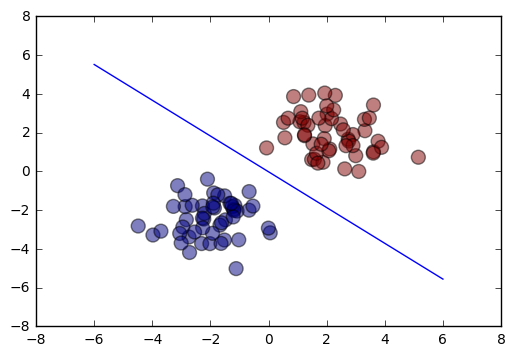

In [36]:
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

### Conclusion

The goal of this post was to demonstrate the link between the theoretical derivation of critical machine learning concepts and their practical application. Without a solid grasp of these concepts, it is virtually impossible to fully comprehend advanced topics in machine learning. To give credit where credit's due, I obtained much of the material for this post from [this](https://www.udemy.com/data-science-logistic-regression-in-python) Logistic Regression class on Udemy. I highly recommend this instructor's courses due to their mathematical rigor.